In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd


## Punto 4

In [2]:
N = 10**4
lista = np.random.rand(N+35)


In [3]:
k = 30
c = []
for k in range(k):
    a = 0.
    for i in range(N):
        a += lista[i]*lista[i+k]
    a *= 1/N
    c.append(a)


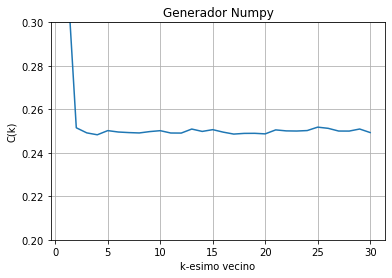

In [4]:
puntos = np.linspace(1, 30, 30)
fig, ax = plt.subplots()

plt.plot(puntos, c)

ax.set_title('Generador Numpy')
ax.set_xlabel('k-esimo vecino', fontsize=10)
ax.set_ylabel('C(k)', fontsize=10)
plt.ylim(0.20, 0.30)
ax.grid()


## Punto 6

In [5]:
def F(x, y, z): return np.exp(np.sqrt(x**2+y**2+z**2))


vmin, vmax = -1, 1
fmin, fmax = 1, np.e
Nmax = 1000000
N = 0
M = 0
rd.seed(65)
while N < Nmax-1:
    x = rd.uniform(vmin, vmax)
    y = rd.uniform(vmin, vmax)
    z = rd.uniform(vmin, vmax)
    f = rd.uniform(fmin, fmax)
    N += 1
    if f < F(x, y, z):
        M += 1


integ = 4*np.pi*(np.e-2)


print("El valor de la integral hallado con Monte-Carlo es {0}".format(
    ((vmax-vmin)**3)*(fmax-fmin)*M/N))
print("El valor real de la integral es {0}".format(integ))


El valor de la integral hallado con Monte-Carlo es 11.381401601693094
El valor real de la integral es 9.02619566197592


## Punto 8

In [6]:
def beta_distribution(x, a, b):
    return (x**(a-1)*(1-x)**(b-1))/(np.math.gamma(a)*np.math.gamma(b)/np.math.gamma(a+b))


def metodo_aceptacion_rechazo(N, a, b):
    x = np.linspace(0, 1, 10000)
    y = beta_distribution(x, a, b)
    ymax = np.max(y)
    x_aceptados = []
    y_aceptados = []
    S = 0
    while len(x_aceptados) < N:
        x_aleatorio = rd.uniform(0, 1)
        y_aleatorio = rd.uniform(0, ymax)
        if y_aleatorio < beta_distribution(x_aleatorio, a, b):
            x_aceptados.append(x_aleatorio)
            y_aceptados.append(y_aleatorio)
            S += 1
    return (S/N), x_aceptados, y_aceptados


def integral_aceptacion_rechazo(N, a, b):
    S, x, y = metodo_aceptacion_rechazo(N, a, b)
    return S


In [7]:
print(
    f'El valor de la integral hallado con el método de aceptación y rechazo es {integral_aceptacion_rechazo(10000, 2, 4)}')


El valor de la integral hallado con el método de aceptación y rechazo es 1.0


## Punto 9

In [8]:
def montecarlo_integral_8(f, a, b, N):
    I = 0
    for i in range(N):
        x1 = rd.uniform(a, b)
        x2 = rd.uniform(a, b)
        x3 = rd.uniform(a, b)
        x4 = rd.uniform(a, b)
        x5 = rd.uniform(a, b)
        x6 = rd.uniform(a, b)
        x7 = rd.uniform(a, b)
        x8 = rd.uniform(a, b)
        I += f(x1, x2, x3, x4, x5, x6, x7, x8)
    return (b-a)*I/N


In [9]:
def f(x1, x2, x3, x4, x5, x6, x7, x8):
    return pow(2, -7)*(x1+x2+x3+x4+x5+x6+x7+x8)**2


In [10]:
integral = montecarlo_integral_8(f, 0, 1, 1000000)
teo = 25/192


In [11]:
print(f'El valor de la integral es {round(integral, 4)}')
print(f'El valor teórico de la integral es {round(teo, 4)}')


El valor de la integral es 0.1302
El valor teórico de la integral es 0.1302
